<a href="https://colab.research.google.com/github/chohoon901/MachineLearning/blob/main/sunghuncho/ch08_ML_08_LightGBM_sunghuncho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle 데이터 다운로드 받기

**데이터셋 다운로드**
1. csv를 그냥 다운로드 받는다 (Jupyter)
    * Colab이면? 다시 업로드 (100mb? 20분씩...)
2. github에 올린다 -> (파일하나당) 150MB? -> 안 올라감
3. google drive -> 느려... -> 기본 n시간
4. wget : 링크를 입력하면 해당 링크의 파일을 다운로드
```
# !wget {파일 링크 주소}
# 예시
!wget https://...
```
5. kaggle api로 직접 다운로드
- kaggle.json -> 인증파일 (인증코드)
```
# colab에서 인증파일 적용하는 법
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
```
```
# Kaggle API를 사용해서 파일을 다운로드
# Kaggle > DataSet > Copy API command
!kaggle datasets download -d kartik2112/fraud-detection
```

## 인증 및 데이터 받기

In [ ]:
# https://www.kaggle.com/datasets/kartik2112/fraud-detection

# 1. 본인 kaggle 계정 인증 받음
# kaggle > Profile 이미지 > Account > Account > API > Create New API Token
from google.colab import files
files.upload()

{}

In [ ]:
# 2. 강사의 kaggle.json (주기적 리셋)
# https://github.com/BigData23th/Data/raw/main/kaggle.json
!wget https://github.com/BigData23th/Data/raw/main/kaggle.json

--2023-03-24 03:00:47--  https://github.com/BigData23th/Data/raw/main/kaggle.json
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BigData23th/Data/main/kaggle.json [following]
--2023-03-24 03:00:47--  https://raw.githubusercontent.com/BigData23th/Data/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      65  --.-KB/s    in 0s      

2023-03-24 03:00:47 (2.47 MB/s) - ‘kaggle.json’ saved [65/65]



In [ ]:
# 인증 및 파일 다운로드 받기
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kartik2112/fraud-detection

fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zusmani/pakistan-toshakhana-files                                  Pakistan ToshaKhana Files                             1MB  2023-03-15 16:25:43           2393        115  1.0              
ramkrijal/tomato-daily-prices                                      Tomato Daily Prices                                  10KB  2023-03-10 15:39:14           1467         47  1.0              
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                      8KB  2023-02-01 12:22:51          14906        482  1.0              
datascientistanna/customers-dataset          

## 압축 풀기 & 합치기

In [ ]:
# zip -> unzip
# 파일 우측 클릭 > 경로 복사
# 파일 > fraudTest.csv, fraudTrain.csv 생성 확인
!unzip /content/fraud-detection.zip

Archive:  /content/fraud-detection.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fraudTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ls: 현재 경로에 있는 다른 파일/폴더를 불러오는 리눅스 명령
!ls

fraud-detection.zip  fraudTest.csv  fraudTrain.csv  sample_data


In [ ]:
# train = pd.read_csv('fraudTrain.csv')
train = pd.read_csv('fraudTrain.csv', index_col=0) # 첫번째 열을 인덱스 컬럼으로 지정

In [ ]:
train.info() # 1296675 / 1.3M

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test = pd.read_csv('fraudTest.csv', index_col=0)

In [ ]:
test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
test.info() # 555719 / 0.55M

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
# 열이 일치하는 두 데이터를 위아래로 합쳐준다 -> pd.concat([합쳐줄 df들])
df=pd.concat(([train,test]),ignore_index=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# 데이터 분석
* https://www.kaggle.com/datasets/kartik2112/fraud-detection/code?datasetId=817870&sortBy=voteCount

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

**Credit Card Transactions Fraud Detection Dataset**
* 이상거래 (fraud) : 갑자기 해킹이나 전산 오류 등으로 인해 잘못된 금액이 결제
* 전산 측에서 갑작스러운 오류/전산상의 실수 데이터등을 잡아내서 '이상거래'를 분류
* 카드 결제 데이터 셋 -> ( ... ) => is_fraud (예측값, 종속변수)

* trans_date_trans_time : 거래 시간 (날짜로 표시된 시간)
* cc_num : 카드 번호. 고윳값이기 때문에 여기서는 id처럼 활용할 수 있음(Credit Card) -> 동명 이인더라도 카드번호는 다르겠죠?
* merchant : 거래 상점
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* amt: 거래금액 (amount)
* first / last : 이름
* gender : 성별
* city / street / state / zip : 고객 거주지 정보
* lat / long : 고객주소에 대한 위도 및 경도
    * 위경도 -> 지구/지도를 기준으로 했을 때 좌표값
* city_pop : 고객의 zipcode (우편번호) 속하는 인구 수
* job : 직업
* dob : 생년월일
* trans_num : 거래번호
* unix_time : 거래시간 (유닉스 타임스탬프 - 전산상으로 변환된 시간)
* merch_lat / merch_long : 상점의 위경도
---
* is_fraud : 사기거래 여부 (이상거래 여부) -> 종속변수

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [ ]:
# df.info() # not-null count가 안나오고 있음 (데이터가 많아서)
# 데이터가 많아도 not-null count를 보여줌
# 다행히 null (결측치) 없는 데이터
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1852394 non-null  object 
 1   cc_num                 1852394 non-null  int64  
 2   merchant               1852394 non-null  object 
 3   category               1852394 non-null  object 
 4   amt                    1852394 non-null  float64
 5   first                  1852394 non-null  object 
 6   last                   1852394 non-null  object 
 7   gender                 1852394 non-null  object 
 8   street                 1852394 non-null  object 
 9   city                   1852394 non-null  object 
 10  state                  1852394 non-null  object 
 11  zip                    1852394 non-null  int64  
 12  lat                    1852394 non-null  float64
 13  long                   1852394 non-null  float64
 14  city_pop          

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe() # int, float 수치형 데이터 관련 통계 데이터 표시
# amt: 거래금액 (amount)
# city_pop : 고객의 zipcode 속하는 인구 수
# -> 선형 모델 어려움, 거리 기반 어렵겠다...

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01
std,1309115265318734848.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


In [ ]:
df.describe(include='O')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,1819551,693,14,355,486,2,999,906,51,497,984,1852394
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1


* trans_date_trans_time : 거래 시간
* merchant : 거래 상점
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* first / last : 이름
* gender : 성별 (F/M)
* city / street / state / zip : 고객 거주지 정보
* job : 직업
* dob : 생년월일
* trans_num : 거래번호

# 전처리

In [ ]:
# 사용되지 않는 변수 제거
# df.drop(..., axis=1) -> 원본 안 바꿔주는 것
# 1. df = df.drop(..., axis=1)
# inplace=True -> 모든 df에 있는 메소드에서 존재하지 X
# 깊은 복사, 얕은 복사 문제 때문에 가능하면 새로운 사본을 만들어서 처리 (immutable)
# 2. df.drop(..., axis=1, inplace=True)
# pd -> 판다스 자체에서 불러오는 것이기 때문에 inplace X
df.drop([
    "first","last",
    "street","city","state","zip",
    "trans_num","unix_time"
],axis=1,inplace=True
)
# 이름 -> 이름 조합을 만들어서 full name / cc_num 고객은 특정 가능
# 주소 -> 위도경도(lat, long)
# 거래번호 / 유닉스타임 (중복) -> trans_date_trans_time
# 직업, 가게명

In [ ]:
df.columns, len(df.columns)

(Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
        'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
        'merch_long', 'is_fraud'],
       dtype='object'), 14)

## trans_date_trans_time

In [ ]:
# trans_date_trans_time  object => datetime 타입으로 바꿔줘야함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   gender                 object 
 6   lat                    float64
 7   long                   float64
 8   city_pop               int64  
 9   job                    object 
 10  dob                    object 
 11  merch_lat              float64
 12  merch_long             float64
 13  is_fraud               int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 197.9+ MB


In [ ]:
# pd.to_datetime -> 문자열 형태의 날짜데이터를, dt으로 포맷을 바꿔줌
# https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   lat                    float64       
 7   long                   float64       
 8   city_pop               int64         
 9   job                    object        
 10  dob                    object        
 11  merch_lat              float64       
 12  merch_long             float64       
 13  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 197.9+ MB


## 피쳐 엔지니어링
* 이상거래 : 원래 고객의 거래패턴에서 벗어나는 거래

### 결제 금액
* 평균에서 벗어난다 -> 정규분포(z 점수)에서 얼마나 멀리 벗어나 있는지
* 서로 다른 개인 -> 특정 -> cc_num : 카드번호별로 묶어서 -> 결제 금액 평균
* 혹시나 너무 갑자기 큰 금액을 썼다면? => 이상거래

In [ ]:
# (groupby로 묶어준 그룹/속성).agg : 특정한 그룹별로 통계값, 대표값 추출
# mean -> 통계값 / std -> 표준편차 : Z점수 (x - 평균) / 표준편차 => 평균으로부터 얼마나 떨어져 있는지 표준화한 값
df.groupby("cc_num").amt.mean()
df.groupby("cc_num").amt.std()
df.groupby("cc_num").amt.agg(["mean","std"])
amt_info=df.groupby("cc_num").amt.agg(["mean","std"])
# index(행 인덱스 이름)로 각 cc_num -> reset index?
amt_info.head()
# 카드번호별로 평균 소비액(mean), 표준편차(std)

,mean,std
cc_num,,
60416207185,59.26,142.87
60422928733,65.48,92.04
60423098130,96.38,1000.69
60427851591,107.49,131.01
60487002085,64.10,153.21


In [ ]:
# 두 개의 데이터프레임을 열 방향으로 합쳐줄 때 -> merge
# A.merge(B) -> A가 왼쪽, B가 오른쪽해서 두 df을 합쳐줌
# 같은 CC_NUM을 가진 거래 기록과, CC_NUM별 소비기록 평균 및 표준편차를 매칭
# 거래 기록 수 > CC_NUM보다 많음 => 같은 CC_NUM을 가졌을 경우 같은 평균, 표준편차를 공유
df=df.merge(amt_info,left_on="cc_num",right_index=True,how="left")
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'mean', 'std'],
      dtype='object')

In [ ]:
# amt (각 거래 기록별 소비금액)
# mean (cc_num별 평균 소비금액)
# std (cc_num별 소비금액의 표준편차)
# https://losskatsu.github.io/statistics/mean-vairance/
# z점수 : 특정한 값이 평균 기준으로 얼마나 멀리 떨어져있는지
df[["cc_num","amt","mean","std"]].head()

,cc_num,amt,mean,std
0,2703186189652095,4.97,89.41,127.53
1,630423337322,107.23,56.08,159.20
2,38859492057661,220.11,69.92,116.69
3,3534093764340240,45.00,80.09,280.08
4,375534208663984,41.96,95.34,94.32


In [ ]:
# z-score = (amt / mean) / std
# 벡터화 연산 (행들을 열들간 연산)
df["amt_z_score"]=(df["amt"]-df["mean"])/df["std"]

In [ ]:
# 특정 amt값이 평균 대비 얼마나 떨어져 있는지 (부호 : 어느 방향)
df["amt_z_score"].head()

0   -0.66
1    0.32
2    1.29
3   -0.13
4   -0.57
Name: amt_z_score, dtype: float64

In [ ]:
# z-score 산출을 위해 쓰인 다른 열들 drop
df.drop(["mean","std"],axis=1,inplace=True)

### 범주별 결제금액
* cc_num -> 카드번호별 / category -> (상점의) 분류.카테고리.범주

In [ ]:
# 2개 이상의 그룹으로 나눌 때는 df.groupby([열 이름들...])
category_info=df.groupby(["cc_num","category"]).amt.agg(["mean","std"])
category_info
# cc_num, category별로 -> 평균값 (결제액), 표준편차

mean    std
cc_num              category                   
60416207185         entertainment  51.84  65.49
                    food_dining    26.74  46.38
                    gas_transport  59.78  15.76
                    grocery_net    52.15  17.69
                    grocery_pos   101.56  21.89
...                                  ...    ...
4992346398065154184 misc_pos       60.00 167.23
                    personal_care  48.78  49.52
                    shopping_net   86.28 217.05
                    shopping_pos   64.21 169.24
                    travel         70.53 496.59

[13171 rows x 2 columns]

In [ ]:
# df와 category_info를 합쳐주겠다 -> cc_num과 category를 기준으로
df=df.merge(category_info,left_on=["cc_num","category"],right_index=True,how="left")
# mean, std
# reset index 안했다?
# df=df.merge(category_info,left_on=["cc_num","category"],how="left")

In [ ]:
# cc_num, category / mean, std / amt => z-score
df[["cc_num","category","amt","mean","std"]].head()

,cc_num,category,amt,mean,std
0,2703186189652095,misc_net,4.97,84.86,116.07
1,630423337322,grocery_pos,107.23,99.64,23.90
2,38859492057661,entertainment,220.11,46.65,60.39
3,3534093764340240,gas_transport,45.00,61.54,15.75
4,375534208663984,misc_pos,41.96,35.48,4.93


In [ ]:
# 범주별 결제금액 z-score
df["cat_z_score"]=(df["amt"]-df["mean"])/df["std"]

In [ ]:
# 1.69 (95%), 2.58 (99%)
df["cat_z_score"].head()

0   -0.69
1    0.32
2    2.87
3   -1.05
4    1.31
Name: cat_z_score, dtype: float64

In [ ]:
# z-score 산출을 위해 쓰인 다른 열들 drop
df.drop(["mean","std"],axis=1,inplace=True)

### 위.경도 -> 거리 산출

In [ ]:
# 두 지점 간의 거리 (위경도)
# latitude(위도, lat), longitude(경도, long, lng)
# geopy.distance.distance((lat1, lng1), (lat2, lng2)) -> 거리

In [ ]:
# coordinate(좌표) - 위,경도.
# -- 좌표 : (위도, 경도) - latitude : 북/남 | logitude : 동/서
# 1. 상점 위경도 (merchant)
# 2. 고객 위경도 (customer)
# zip -> 2개 이상의 리스트를 원소 순서대로 묶어주겠음
df["merch_coord"]=pd.Series(zip(df.merch_lat,df.merch_long))
df["cust_coord"]=pd.Series(zip(df["lat"],df["long"]))

In [ ]:
import geopy.distance # 거리 구하는 파이썬 라이브러리
#  df.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1)
def get_distance(row): 
    coord1 = row['merch_coord'] # [merch_lat, merch_long] / 상점 위경도
    coord2 = row['cust_coord'] # [lat, long] / 고객 위경도
    return geopy.distance.distance(coord1, coord2).km

In [ ]:
df["distance"]=df.apply(get_distance,axis=1)

In [ ]:
df['distance'].head()# km

0    78.77
1    30.22
2   108.10
3    95.69
4    77.70
Name: distance, dtype: float64

In [ ]:
df2 = df.copy()

In [ ]:
# .km 빼먹고 했다?
# 78.77 km => 78.77 / km => 78.77 (string) => float
# df['distance'] = df['distance'].str.split(expand=True)[0].astype('float64')


In [ ]:
# 거주 위치 - 결제 위치가 너무 차이난다?
# z-점수
distance_info = df.groupby('cc_num').distance.agg(['mean', 'std'])

In [ ]:
distance_info

,mean,std
cc_num,,
60416207185,73.53,28.70
60422928733,78.99,29.30
60423098130,77.83,28.19
60427851591,75.71,28.98
60487002085,79.44,28.77
...,...,...
4958589671582726883,76.74,29.12
4973530368125489546,78.75,29.45
4980323467523543940,72.27,28.28


In [ ]:
# 1.

# 2.
df=df.merge(distance_info, left_on='cc_num',right_index=True, how='left')
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,...,merch_lat,merch_long,is_fraud,amt_z_score,cat_z_score,merch_coord,cust_coord,distance,mean,std
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.08,-81.18,3495,"Psychologist, counselling",...,36.01,-82.05,0,-0.66,-0.69,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.77,77.84,30.07
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.89,-118.21,149,Special educational needs teacher,...,49.16,-118.19,0,0.32,0.32,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.22,71.66,28.09
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.18,-112.26,4154,Nature conservation officer,...,43.15,-112.15,0,1.29,2.87,"(43.150704, -112.154481)","(42.1808, -112.262)",108.10,74.58,28.88
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.23,-112.11,1939,Patent attorney,...,47.03,-112.56,0,-0.13,-1.05,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.69,72.05,28.89
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.42,-79.46,99,Dance movement psychotherapist,...,38.67,-78.63,0,-0.57,1.31,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.70,75.84,29.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,40.49,-91.89,519,Town planner,...,39.95,-91.33,0,-0.17,-0.05,"(39.946837, -91.333331)","(40.4931, -91.8912)",77.03,75.52,28.96
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.04,-95.44,28739,Futures trader,...,29.66,-96.19,0,0.36,1.16,"(29.661049, -96.186633)","(29.0393, -95.4401)",100.02,79.17,30.05
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.20,-118.90,3684,Musician,...,46.66,-119.72,0,-0.02,0.44,"(46.65834, -119.715054)","(46.1966, -118.9017)",80.89,72.66,28.55
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,44.63,-116.45,129,Cartographer,...,44.47,-117.08,0,-0.59,-0.01,"(44.470525, -117.080888)","(44.6255, -116.4493)",53.06,73.69,28.26


In [ ]:
# z_score : 평균을 0으로 뒀을 때 얼마나 떨어있는지를 표준화 (z점수, 표준정규분포)
df["distance_z_score"]=(df["amt"]-df["mean"])/df["std"]

In [ ]:
df["distance_z_score"].head()

0   -2.42
1    1.27
2    5.04
3   -0.94
4   -1.16
Name: distance_z_score, dtype: float64

In [ ]:
# 사용한 통계치 drop
df.drop(['mean', 'std'], axis=1, inplace=True)

In [ ]:
df.isna().mean()

trans_date_trans_time   0.00
cc_num                  0.00
merchant                0.00
category                0.00
amt                     0.00
gender                  0.00
lat                     0.00
long                    0.00
city_pop                0.00
job                     0.00
dob                     0.00
merch_lat               0.00
merch_long              0.00
is_fraud                0.00
amt_z_score             0.00
cat_z_score             0.00
merch_coord             0.00
cust_coord              0.00
distance                0.00
distance_z_score        0.00
dtype: float64

### 생년월일 (dob) -> 연령

In [ ]:
df['dob']

0          1988-03-09
1          1978-06-21
2          1962-01-19
3          1967-01-12
4          1986-03-28
              ...    
1852389    1966-02-13
1852390    1999-12-27
1852391    1981-11-29
1852392    1965-12-15
1852393    1993-05-10
Name: dob, Length: 1852394, dtype: object

In [ ]:
pd.to_datetime(df['dob'])

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1852389   1966-02-13
1852390   1999-12-27
1852391   1981-11-29
1852392   1965-12-15
1852393   1993-05-10
Name: dob, Length: 1852394, dtype: datetime64[ns]

In [ ]:
# year
# pd.to_datetime(df['dob']).year # 에러남 (year 없음)
# dt 속성 : 특정 시리즈/df에서 dt의 메소드/속성을 사용할 수 있게함 (참고: str)
pd.to_datetime(df['dob']).dt.year

0          1988
1          1978
2          1962
3          1967
4          1986
           ... 
1852389    1966
1852390    1999
1852391    1981
1852392    1965
1852393    1993
Name: dob, Length: 1852394, dtype: int64

In [ ]:
# 만 나이
df["age"]=2023-pd.to_datetime(df['dob']).dt.year

In [ ]:
df["age"]

0          35
1          45
2          61
3          56
4          37
           ..
1852389    57
1852390    24
1852391    42
1852392    58
1852393    30
Name: age, Length: 1852394, dtype: int64

## 범주형 변수 처리

In [ ]:
# 필요없는 열(변수) drop
df.drop(['cc_num', 'lat', 'long', 'merch_lat', 'merch_long',
         'dob', 'merch_coord', 'cust_coord'], axis=1, inplace=True)

In [ ]:
df.drop(["merchant","job"],axis=1,inplace=True)

In [ ]:
# 더미 변수 만들기
df.describe(include='object')

,category,gender
count,1852394,1852394
unique,14,2
top,gas_transport,F
freq,188029,1014749


In [ ]:
df = pd.get_dummies(df, columns = df.describe(include='O').columns)
df

,trans_date_trans_time,amt,city_pop,is_fraud,amt_z_score,cat_z_score,distance,distance_z_score,age,category_entertainment,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,2019-01-01 00:00:18,4.97,3495,0,-0.66,-0.69,78.77,-2.42,35,0,...,0,0,1,0,0,0,0,0,1,0
1,2019-01-01 00:00:44,107.23,149,0,0.32,0.32,30.22,1.27,45,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-01-01 00:00:51,220.11,4154,0,1.29,2.87,108.10,5.04,61,1,...,0,0,0,0,0,0,0,0,0,1
3,2019-01-01 00:01:16,45.00,1939,0,-0.13,-1.05,95.69,-0.94,56,0,...,0,0,0,0,0,0,0,0,0,1
4,2019-01-01 00:03:06,41.96,99,0,-0.57,1.31,77.70,-1.16,37,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,43.77,519,0,-0.17,-0.05,77.03,-1.10,57,0,...,0,0,0,0,0,0,0,0,0,1
1852390,2020-12-31 23:59:09,111.84,28739,0,0.36,1.16,100.02,1.09,24,0,...,0,1,0,0,0,0,0,0,0,1
1852391,2020-12-31 23:59:15,86.88,3684,0,-0.02,0.44,80.89,0.50,42,0,...,0,1,0,0,0,0,0,0,1,0
1852392,2020-12-31 23:59:24,7.99,129,0,-0.59,-0.01,53.06,-2.33,58,0,...,0,0,0,0,0,0,0,1,0,1


# 모델링

## 훈련셋/시험셋

In [ ]:
# 과거의 이상거래를 사용해서 -> 미래의 이상거래를 감지
# 시간 단위로 훈련셋/시험셋을 나눠줘야함
# grid search cv, train_test_split
# 날짜 단위로 나눠주기

In [ ]:
df.index

RangeIndex(start=0, stop=1852394, step=1)

In [ ]:
# trans_date_trans_time -> dt 인덱스
df.set_index('trans_date_trans_time', inplace=True)

In [ ]:
df.index # 2020-07-01 이전, 이후 데이터 나눠서 train, test

DatetimeIndex(['2019-01-01 00:00:18', '2019-01-01 00:00:44',
               '2019-01-01 00:00:51', '2019-01-01 00:01:16',
               '2019-01-01 00:03:06', '2019-01-01 00:04:08',
               '2019-01-01 00:04:42', '2019-01-01 00:05:08',
               '2019-01-01 00:05:18', '2019-01-01 00:06:01',
               ...
               '2020-12-31 23:57:18', '2020-12-31 23:57:50',
               '2020-12-31 23:57:56', '2020-12-31 23:58:04',
               '2020-12-31 23:58:34', '2020-12-31 23:59:07',
               '2020-12-31 23:59:09', '2020-12-31 23:59:15',
               '2020-12-31 23:59:24', '2020-12-31 23:59:34'],
              dtype='datetime64[ns]', name='trans_date_trans_time', length=1852394, freq=None)

In [ ]:
train = df[df.index < '2020-07-01'] # 2020년 7월 1일 이전 데이터 (경계 미포함)
test = df[df.index >= '2020-07-01']# 2020년 7월 1일 이후 데이터 (경계 포함)

In [ ]:
# 예측값(종속변수, y) : is_fraud
# 관측값(독립변수, X) : 나머지
X_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

## 모델 학습

In [ ]:
import lightgbm as lgb

In [ ]:
# 연속형 변수를 예측하는 '회귀' 문제를 푼다면? lgb.LGBMRegressor
# 범주형 변수를 예측하는 '분류' 문제를 푼다면? lgb.LGBMClassifier
model = lgb.LGBMClassifier(random_state=324)

In [ ]:
model.fit(X_train, y_train)

LGBMClassifier(random_state=324)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9957995742503248

In [ ]:
df.is_fraud.mean()

0.005210014716091717

In [ ]:
1 - df.is_fraud.mean()

0.9947899852839083

# 평가

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
# 실제 y값, 예측 y값을 넣어주면 confusion matrix를 그려주는 함수
def confusion_matrix_view(y_test, pred):
    cf_matrix = confusion_matrix(y_test, pred) # 배열 
    #  [ [ TN , FP ],
    #    [ FN , TP ] ]
    print(cf_matrix)
    group_names = ['TN','FP','FN','TP'] # 각기 4개의 그룹으로
    # TN : 실제 0, 분류 0
    # TP : 실제 1, 분류 1
    # FP : 위양성, 실제 0, 분류 1 -> 1종 오류
    # FN : 위음성, 실제 1, 분류 0 -> 2종 오류
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()] # 그룹별 갯수 / arr.flatten() -> 한 줄로
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)] # 그룹별 비중, 비율
                        # flatten -> 2 x 2 -> 4 -> 합계로 나눠준 것
    # v1 : 그룹명 -> 이진분류(TN,FP,FN,TP...) -> 3개이상이면? 0->1, 1->1...
    # v2 : 그룹별 갯수
    # v3 : 그룹별 비중(비율)
    # \n -> Enter (줄바꿈)
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2) # 2 x 2
    # ['TN','FP','FN','TP']
    '''
      [['TN','FP'],
       ['FN','TP']]
    '''
    # seaborn.heatmap(열마다 크기에 따라서 색상/짙음 정도를 결정)
    # cmap -> colormap -> 어떠한 색상표를 쓸 것이냐
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True') # 실제값
    plt.xlabel('Predicted') # 예측값
    plt.show()
    # 분류 리포트
    print(classification_report(y_test, pred))

[[522492   1157]
 [  1051    961]]


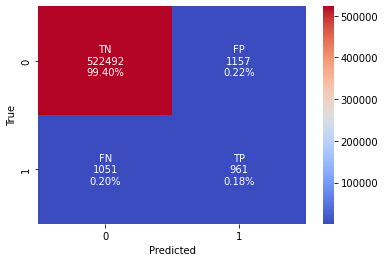

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.45      0.48      0.47      2012

    accuracy                           1.00    525661
   macro avg       0.73      0.74      0.73    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
confusion_matrix_view(y_test, pred)

In [ ]:
# 정밀도 - precision - 1종 오류 (FP)
# 재현율 - recall - 2종 오류 (FN)
# f1 점수 - 정밀도와 재현율의 조화평균 -> 두 수치의 영향력을 모두 확인
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.45      0.48      0.47      2012

    accuracy                           1.00    525661
   macro avg       0.73      0.74      0.73    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0, 1 => 분류되기 전에 얼마나 각각의 확률이 산출되는지
model.predict_proba(X_test)

array([[9.99988692e-01, 1.13082938e-05],
       [9.99906957e-01, 9.30428550e-05],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99861207e-01, 1.38792685e-04],
       [9.99671321e-01, 3.28679254e-04],
       [9.99876067e-01, 1.23933151e-04]])

In [ ]:
# 각 행 -> 입력받은 시험셋의 행 데이터별로, 각각의 분류가 될 확률
# 2차원 행열 -> 각각 열
# 1(0)열 : 0에 대한 예측값 (확률값)
# 2(1)열 : 1에 대한 예측값 (확률값)
proba = model.predict_proba(X_test)

In [ ]:
# numpy 인덱싱 -> [행, 열] -> [:(모든 행), n]
# 예측값이 1이 될 확률 / 이상거래일 확률
proba=proba[:,1]

In [ ]:
# proba = 이상거래일 확률 예측치

0.0028288193341335956

In [ ]:
# default : 0.5보다 크면 -> 1로 분류
# 민감하게 혹은 둔감하게 처리 가능
# case 1 : 0.2만 넘으면 1로 분류 (느슨함)
# case 2 : 0.8을 넘어야 1로 분류 (엄격함)
# 벡터화 연산으로 비교 연산 (> 0.2) => T/F => astype(int) 0/1
proba_int1=(proba>0.2)*1
proba_int1

array([0, 0, 0, ..., 0, 0, 0])

0과 1로 구성되어 있는 데이터에 `mean` 평균을 내면 -> 1의 비중을 알 수 있음 -> 예측치로 환산한다면? -> 이상거래로 분류된 비중

In [ ]:
# 기준이 0.5일 때의 예측치
pred.mean()

0.004029212743574281

In [ ]:
# 기준이 0.2일 때의 예측치
proba_int1.mean()

0.005667150501939463

In [ ]:
proba_int2=(proba>0.8)*1
proba_int2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 기준이 0.8일 때의 예측치
proba_int2.mean()

0.0028288193341335956

[[522492   1157]
 [  1051    961]]


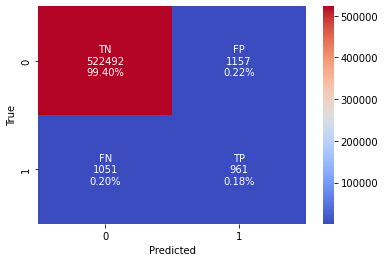

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.45      0.48      0.47      2012

    accuracy                           1.00    525661
   macro avg       0.73      0.74      0.73    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0.5 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test,pred)

[[521786   1863]
 [   896   1116]]


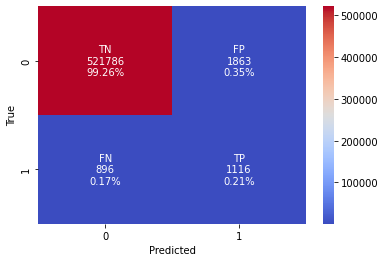

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.37      0.55      0.45      2012

    accuracy                           0.99    525661
   macro avg       0.69      0.78      0.72    525661
weighted avg       1.00      0.99      1.00    525661



In [ ]:
# 0.2 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test,proba_int1)
# FP가 늘었음 (1종 오류가 늘었음 -> 이상거래가 아닌데 맞다고 판단한 것이 늘었음)
# FN은 줄었음 (2종 오류가 줄었음 -> 이상거래 맞는데 아니라고 판단한 것이 줄었음)

[[522879    770]
 [  1295    717]]


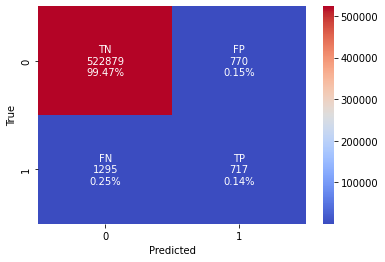

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.48      0.36      0.41      2012

    accuracy                           1.00    525661
   macro avg       0.74      0.68      0.70    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0.8 를 기준으로 했을 때의 혼동행렬, 분류리포트
confusion_matrix_view(y_test,proba_int2)
# FP가 줄었음 (1종 오류가 줄었음 -> 이상거래가 아닌데 맞다고 판단한 것이 줄었음)
# FN은 늘었음 (2종 오류가 늘었음 -> 이상거래 맞는데 아니라고 판단한 것이 늘었음)

## ROC 곡선 & AUC

![ROC](https://i.imgur.com/euCumVh.png)

* [참고](https://losskatsu.github.io/machine-learning/stat-roc-curve/#2-%EB%AF%BC%EA%B0%90%EB%8F%84%EC%99%80-%ED%8A%B9%EC%9D%B4%EB%8F%84)
* 이진분류 모델을 평가하는 방법으로 기준점에 영향을 받지 않기 때문에 여러 모델을 비교할 때 요긴하게 사용
* AUC는 ROC 곡선의 아래 면적을 의미
    * 0.5~1 사이의 값을 지니며 높을수록 좋은 모델

## ROC 곡선
> 민감도, 특이도 개념을 활용

### 민감도 (TPR)
$TPR = \frac{TP(참 양성)}{TP(참 양성) + FN(거짓 음성)}$
* 재현율과 수식이 같음
* 실제 1인 것 중 얼마만큼 제대로(1로) 예측되었는지
* 1에 가까울 수록 좋은 수치

### 특이도 (TNR) **
$TNR = \frac{TN(참 음성)}{FP(거짓 양성) + TN(참 음성)}$
* 실제 0인 것 중 얼마만큼 제대로(0로) 예측되었는지
* 1에 가까울 수록 좋은 수치

$FPR = \frac{FP(거짓 양성)}{FP(거짓 양성) + TN(참 음성)}$
* 실제 0인 것 중 얼마만큼 잘못(1로) 예측되었는지
* 0에 가까울 수록 좋은 수치
$FPR = 1 - TNR$

민감도(TPR)을 높이기 위해서 기준을 낮추면, 반대로 FPR은 증가하게 되어 있음
(역의 관계)
하지만 예측력이 좋은 모델이라면 그 변화치가 높지 않음

![ROC](https://i.imgur.com/euCumVh.png)
* 기준점을 바꿨을 때 TPR, FPR이 어떻게 바뀌는지 보여주는 그래프
* 최악의 경우 (학습이 전혀 안될 경우) -> 빨간색 점선

### AUC (Area Under the ROC Curve)
* ROC 곡선의 아래쪽에 해당하는 면적
* 0.5~1 사이의 값을 가지며 커질 수록 더 좋은 분류기라는 의미
![AUC](https://i.imgur.com/udlCMW4.png)

In [ ]:
# 0과 1을 얼마나 잘 분류하는지 (성능 좋은지)
# proba -> 1이 될 확률
roc_auc_score(y_test, proba)

# 하이퍼 패러미터 튜닝
* 그리드 서치 : 주입할 패러미터 목록들을 딕셔너리 형태로 넣어서, 각각의 패러미터들을 모두 조합한 모델들을 학습시켜봐서, 최적의 모델을 찾는 것
    * 너무 다 시도해봤자, 결국은 시간낭비일 수 있음
    * 빨리 적당한 패러미터 조합이 필요할 수도 있음
* 랜덤 서치 : 더 넓은 영역의 하이퍼 파라미터 값을 더 짧은 시간에 다양하게 활용
    * 일부만 추출해서 모델링 -> 시간이 더 짧아짐

## 랜덤 서치

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# 랜덤 서치에 사용될 파라미터들 (딕셔너리)
params = {
    "n_esimators": [100, 500, 1000], # 총 생성할 트리 개수
    "learning_rate": [0.01, 0.05, 0.1, 0.3], # 경사하강법에 적용할 학습률 (오차를 어느 범위만큼 수정할까)
    # 너무 작으면 -> 오버피팅, 시간 오래걸림 / 너무 크면 -> 학습이 제대로 안됨
    "lambda_l1": [0, 10, 20, 30, 50],
    "lambda_l2": [0, 10, 20, 30, 50],
    # 경사하강법과 관련 -> 오버피팅 줄이기
    "max_depth": [5, 10, 15, 20], # 트리의 최대깊이 / 과적합
    "subsample": [0.6, 0.8, 1] # 일부의 데이터만 사용해서 트리를 만들게 (1: 전체)
}

**L1 정규화(lambda_l1)와 L2 정규화(lambda_l2)**
* 라쏘 회귀(lasso regression) - L1 정규화
* 릿지 회귀(rigde regression) - L2 정규화
> 둘 다 매개 변수에 패널티를 가해서 그 영향력(계수)을 감소 시키는 방법.<br>
오버피팅을 방지하는 목적으로 쓰임

In [ ]:
model2 = lgb.LGBMClassifier(random_state=26)
# (학습에 쓰일 모델, param_distributions 랜덤 서치에 쓰일 파라미터들, n_iter 몇 번 조합을 추출할지
#  scoring 모델 간 비교 수치, n_jobs cpu 코어 개수 (-1: 전체))
rs = RandomizedSearchCV(model2, param_distributions=params, n_iter=30,
                        scoring='roc_auc', random_state=26, n_jobs=-1)

In [ ]:
import time
start = time.time() 
rs.fit(X_train, y_train)
print(time.time() - start)

[LightGBM] [Warning] Unknown parameter: n_esimators
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
1565.6436023712158


In [ ]:
rs.best_params_ # 이 조합을 쓰면 됨

{'subsample': 1,
 'n_esimators': 100,
 'max_depth': 10,
 'learning_rate': 0.3,
 'lambda_l2': 50,
 'lambda_l1': 0}

In [ ]:
rs.best_score_ # 5개 정도로 나온 값들이 평균치

0.9944682976255962

In [ ]:
rs_proba = rs.predict_proba(X_test)

[[523286    363]
 [   779   1233]]


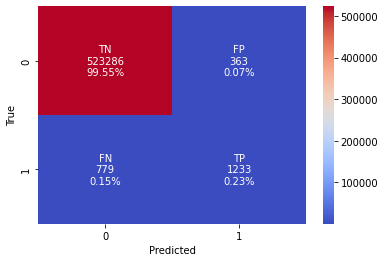

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.77      0.61      0.68      2012

    accuracy                           1.00    525661
   macro avg       0.89      0.81      0.84    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# rs_proba[:, 1] : proba -> 0열 : 0이 될 확률, 1열: 1이 될 확률
# [모든행중에, 1번째열] -> 1이 될 확률만 호출
# roc_auc_score(y_test, rs_proba[:, 1])
confusion_matrix_view(y_test, rs.predict(X_test))

[[522492   1157]
 [   487   1525]]


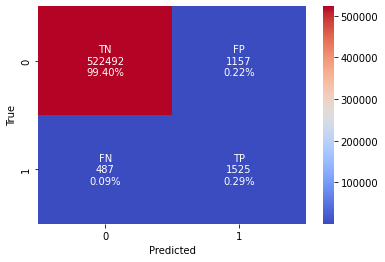

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.57      0.76      0.65      2012

    accuracy                           1.00    525661
   macro avg       0.78      0.88      0.82    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0.2로 조금 더 느슨하게 (정밀도를 희생하고, 재현율 높임)
rs_proba_int1 = (rs_proba[:,1] > 0.2).astype('int') # 1이 될 확률이 0.2만 넘어가도 1로 취급
confusion_matrix_view(y_test, rs_proba_int1)

[[523615     34]
 [  1159    853]]


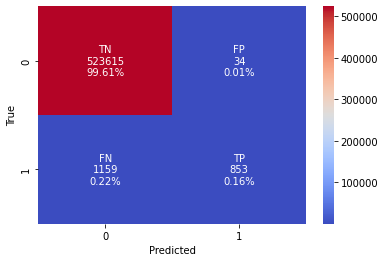

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.96      0.42      0.59      2012

    accuracy                           1.00    525661
   macro avg       0.98      0.71      0.79    525661
weighted avg       1.00      1.00      1.00    525661



In [ ]:
# 0.8로 조금 더 엄격하게 (정밀도를 높이고, 재현율 희생)
rs_proba_int2 = (rs_proba[:,1] > 0.8).astype('int') # 1이 될 확률이 0.8이 넘어야 1로 취급
confusion_matrix_view(y_test, rs_proba_int2)

# 변수 중요도

In [ ]:
model.feature_importances_

array([443, 345, 357, 453, 264, 278, 371,  22,  37,  27,  12,  68,  16,
        42,  28,  27,  19,  26,  32,  34,  33,  33,  33], dtype=int32)

In [ ]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data=feature_imp.sort_values(by='values', ascending=False).head(10))
plt.show()